In [185]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# Loading the dataframe
df = pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [187]:
# Rearranging the dataframe
df = df.drop('streams', axis=1).assign(streams=df['streams'])
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,43,263,...,B,Major,80,89,83,31,0,8,4,141381703
1,LALA,Myke Towers,1,2023,3,23,1474,48,48,126,...,C#,Major,71,61,74,7,0,10,4,133716286
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,94,207,...,F,Major,51,32,53,17,0,31,6,140003974
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,116,207,...,A,Major,55,58,72,11,0,11,15,800840817
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,84,133,...,A,Minor,65,23,80,14,63,11,6,303236322


In [188]:
# Checking unique values
num_track_name = df['track_name'].count()
unique_track_name = df['track_name'].nunique()
num_repeated_track_name = num_track_name - unique_track_name
print(num_repeated_track_name)
num_artists_name = df['artist(s)_name'].count()
unique_artists_name = df['artist(s)_name'].nunique()
num_repeated_artists_name = num_artists_name - unique_artists_name
print(num_repeated_artists_name)
df = df.drop(['track_name','artist(s)_name'], axis=1)
df.head()

10
308


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams
0,2,2023,7,14,553,147,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,141381703
1,1,2023,3,23,1474,48,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,133716286
2,1,2023,6,30,1397,113,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,140003974
3,1,2019,8,23,7858,100,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,800840817
4,1,2023,5,18,3133,50,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,303236322


In [189]:
# Encoding Stings
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
label_encoder = LabelEncoder()
for col in df:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams
0,2,2023,7,14,553,147,43,263,217,10,...,2,0,80,89,83,31,0,8,4,141381703.0
1,1,2023,3,23,1474,48,48,126,262,14,...,3,0,71,61,74,7,0,10,4,133716286.0
2,1,2023,6,30,1397,113,94,207,337,14,...,7,0,51,32,53,17,0,31,6,140003974.0
3,1,2019,8,23,7858,100,116,207,50,12,...,0,0,55,58,72,11,0,11,15,800840817.0
4,1,2023,5,18,3133,50,84,133,330,15,...,0,1,65,23,80,14,63,11,6,303236322.0


Correlation with 'streams':
streams                 1.000000
in_spotify_playlists    0.831947
in_apple_playlists      0.667857
in_apple_charts         0.334660
in_shazam_charts        0.286586
in_spotify_charts       0.255055
in_deezer_charts        0.227719
in_deezer_playlists     0.087219
key                     0.015805
released_day            0.009800
released_month          0.005326
bpm                     0.003626
instrumentalness_%     -0.004567
energy_%               -0.032472
valence_%              -0.037821
mode                   -0.052860
liveness_%             -0.059693
acousticness_%         -0.060358
danceability_%         -0.081668
speechiness_%          -0.107816
artist_count           -0.155424
released_year          -0.681517
Name: streams, dtype: float64


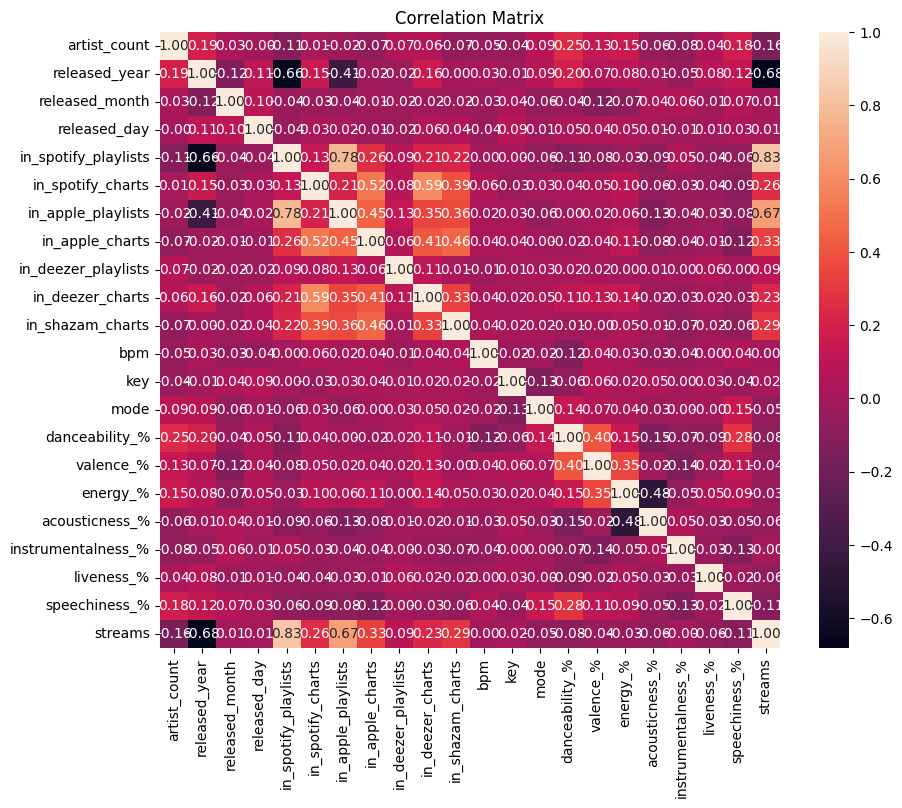


Selected features based on the threshold of 0.1:
['in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_shazam_charts', 'in_spotify_charts', 'in_deezer_charts', 'speechiness_%', 'artist_count', 'released_year']


<ipython-input-190-529187b08958>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_selection['streams'] = df['streams']


,in_spotify_playlists,in_apple_playlists,in_apple_charts,in_shazam_charts,in_spotify_charts,in_deezer_charts,speechiness_%,artist_count,released_year,streams
0,553,43,263,185,147,10,4,2,2023,141381703.0
1,1474,48,126,118,48,14,4,1,2023,133716286.0
2,1397,94,207,193,113,14,6,1,2023,140003974.0
3,7858,116,207,149,100,12,15,1,2019,800840817.0
4,3133,84,133,125,50,15,6,1,2023,303236322.0


In [190]:
# Feature Selection
corr_matrix = df.corr(method='spearman')
target_correlation = corr_matrix['streams'].sort_values(ascending=False)
print("Correlation with 'streams':")
print(target_correlation)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
threshold = 0.1
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
selected_features.remove('streams')
print("\nSelected features based on the threshold of {}:".format(threshold))
print(selected_features)
df_feature_selection = df[selected_features]
df_feature_selection['streams'] = df['streams']
df_feature_selection.head()

In [192]:
# Dealing with null values
print(df_feature_selection.isnull().sum())
df_no_null = df_feature_selection.dropna()
print(df_no_null.isnull().sum())
print(len(df_no_null))
df_no_null.head()

in_spotify_playlists    0
in_apple_playlists      0
in_apple_charts         0
in_shazam_charts        0
in_spotify_charts       0
in_deezer_charts        0
speechiness_%           0
artist_count            0
released_year           0
streams                 1
dtype: int64
in_spotify_playlists    0
in_apple_playlists      0
in_apple_charts         0
in_shazam_charts        0
in_spotify_charts       0
in_deezer_charts        0
speechiness_%           0
artist_count            0
released_year           0
streams                 0
dtype: int64
952


,in_spotify_playlists,in_apple_playlists,in_apple_charts,in_shazam_charts,in_spotify_charts,in_deezer_charts,speechiness_%,artist_count,released_year,streams
0,553,43,263,185,147,10,4,2,2023,141381703.0
1,1474,48,126,118,48,14,4,1,2023,133716286.0
2,1397,94,207,193,113,14,6,1,2023,140003974.0
3,7858,116,207,149,100,12,15,1,2019,800840817.0
4,3133,84,133,125,50,15,6,1,2023,303236322.0


In [193]:
# Dealing with outliers
cols_to_exclude = ['streams']
filtered_df = df_no_null.drop(cols_to_exclude, axis=1)
z_scores = np.abs((filtered_df - filtered_df.mean()) / filtered_df.std())
threshold = 3
outliers = df_no_null[(z_scores > threshold).any(axis=1)]
df_no_outliers = df_no_null.drop(outliers.index)
print(len(df_no_outliers))
df_no_outliers.head()

815


,in_spotify_playlists,in_apple_playlists,in_apple_charts,in_shazam_charts,in_spotify_charts,in_deezer_charts,speechiness_%,artist_count,released_year,streams
1,1474,48,126,118,48,14,4,1,2023,133716286.0
4,3133,84,133,125,50,15,6,1,2023,303236322.0
7,714,25,89,59,43,13,4,1,2023,58149378.0
9,2953,49,110,108,44,13,33,2,2023,553634067.0
11,422,37,202,47,55,5,7,1,2023,58255150.0


In [194]:
# Normalized Data
cols_to_normalize = df_no_outliers.columns[:-1]
X = df_no_outliers[cols_to_normalize].values
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
df_no_outliers[cols_to_normalize] = X_normalized
df_clean = df_no_outliers
df_clean.head()

,in_spotify_playlists,in_apple_playlists,in_apple_charts,in_shazam_charts,in_spotify_charts,in_deezer_charts,speechiness_%,artist_count,released_year,streams
1,0.051534,0.152381,0.623762,0.595960,0.695652,0.70,0.054054,0.000000,1.0,133716286.0
4,0.110782,0.266667,0.658416,0.631313,0.724638,0.75,0.108108,0.000000,1.0,303236322.0
7,0.024392,0.079365,0.440594,0.297980,0.623188,0.65,0.054054,0.000000,1.0,58149378.0
9,0.104353,0.155556,0.544554,0.545455,0.637681,0.65,0.837838,0.333333,1.0,553634067.0
11,0.013964,0.117460,1.000000,0.237374,0.797101,0.25,0.135135,0.000000,1.0,58255150.0


In [205]:
# Train Test Split
X = df_clean[selected_features]
y = df_clean['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (652, 9) (652,)
Testing set shape: (163, 9) (163,)


In [209]:
# Creating Polynomial Regression Class
class PolynomialRegression:
    def __init__(self, degree=1):
        self.degree = degree

    def Additional_Features(self, X_test):
        X_new = X_test.copy()
        for d in range(2, self.degree + 1):
            X_new = np.concatenate((X_new, X_test ** d), axis=1)
        return X_new

    def fit(self, X_test, y_test):
        X_new = self.Additional_Features(X_test)
        pseudo_inverse = np.linalg.pinv(X_new.T.dot(X_new))
        self.theta = pseudo_inverse.dot(X_new.T).dot(y_test)

    def predict(self, X_test):
        X_new = self.Additional_Features(X_test)
        return X_new.dot(self.theta)

    def r2_error(self, y_test, y_pred):
        r2_num = np.sum((y_pred - y_test) ** 2)
        r2_den = np.sum((np.mean(y_test) - y_pred) ** 2)
        r2 = 1 - (r2_num / r2_den)
        return r2

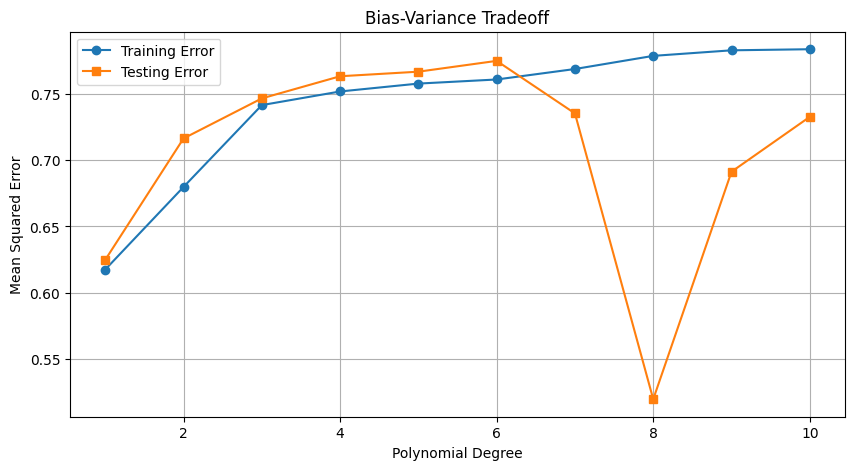

In [210]:
# Plotting the Bias Variance Tradeoff
def train_with_different_degrees(X_train, y_train, X_test, y_test, max_degree):
    degrees = range(1, max_degree + 1)
    train_errors = []
    test_errors = []
    for degree in degrees:
        model = PolynomialRegression(degree=degree)
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
        train_errors.append(model.r2_error(y_train, predictions_train))
        test_errors.append(model.r2_error(y_test, predictions_test))
    return degrees, train_errors, test_errors

max_degree = 10
degrees, train_errors, test_errors = train_with_different_degrees(X_train, y_train, X_test, y_test, max_degree)

plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='s')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

In [211]:
# Running the model
model = PolynomialRegression(degree=6)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = model.r2_error(y_test, predictions)
r2

0.774860196999111